In [1]:
import pandas as pd
import numpy as np
from pymatgen.core import Composition

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns

# Splitting data into training and testing
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['Times New Roman'],
    "font.size": 24, 
    'axes.unicode_minus': False 
}
rcParams.update(config)
plt.rcParams['axes.unicode_minus'] = False  
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (8, 6),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300 

In [2]:
# https://www.snumat.com/¶
hse_data = pd.read_csv('./data/hse_data.csv', index_col=0)
hse_data

,Material,Chemical_formula,Band_gap_HSE,Direct_or_indirect_HSE,Band_gap_GGA,Space_group_cif,Free_energy
0,Ge1Se8V4,Ge(V4Se8),0.000000,Indirect,0.000000,44.0,-5.897176
1,Cu2Ge1Se3,Cu2(GeSe3),0.357144,Indirect,0.057361,9.0,-3.574910
2,Cl4Co1Na2,Na2(CoCl4),4.477341,Direct,2.780673,62.0,-3.567538
3,Cr1Na1Se2,NaCrSe2,1.138949,Indirect,0.407413,166.0,-4.752246
4,Al2Fe3Si4,AlFe1.50Si2,0.000000,Indirect,0.000000,63.0,-6.420703
...,...,...,...,...,...,...,...
13714,Ga2In6O8Pt1,(PtIn6)(GaO4)2,1.503397,Indirect,0.613842,225.0,-5.429347
13715,Ge1In7Ir1O8,IrIn7GeO8,1.276845,Indirect,0.422346,216.0,-5.519259
13716,Ge1Mn1O4Zn1,ZnMn(GeO4),2.672193,Indirect,1.597849,62.0,-6.256881
13717,Ge2Mn1O7Sr2,Sr2Mn(Ge2O7),3.170080,Direct,2.025250,113.0,-6.705552


In [3]:
hse_data = hse_data[['Material','Band_gap_HSE','Band_gap_GGA','Space_group_cif','Free_energy']]
hse_data.columns = ['formula', 'HSE', 'GGA', 'spacegroup','free_energy']
hse_data = hse_data.drop(index=hse_data[hse_data['formula'].str.contains('D')].index).reset_index(drop=True)
hse_data['index'] = hse_data.index
df = hse_data

In [4]:
df['composition'] = df['formula'].map(Composition)
elems_to_drop = ['He','Ne','Ar','Kr','Xe','Rn','Og']
indexes_to_drop = []
for index, row in df.iterrows():
    comp = row['composition']
    if len(comp) < 2 :
        indexes_to_drop.append(index)
    else:
        for elem in elems_to_drop:
            if str(row['formula']).__contains__(elem):
                indexes_to_drop.append(index)
df = df.drop(index=indexes_to_drop).reset_index(drop=True)
df

,formula,HSE,GGA,spacegroup,free_energy,index,composition
0,Ge1Se8V4,0.000000,0.000000,44.0,-5.897176,0,"(Ge, Se, V)"
1,Cu2Ge1Se3,0.357144,0.057361,9.0,-3.574910,1,"(Cu, Ge, Se)"
2,Cl4Co1Na2,4.477341,2.780673,62.0,-3.567538,2,"(Cl, Co, Na)"
3,Cr1Na1Se2,1.138949,0.407413,166.0,-4.752246,3,"(Cr, Na, Se)"
4,Al2Fe3Si4,0.000000,0.000000,63.0,-6.420703,4,"(Al, Fe, Si)"
...,...,...,...,...,...,...,...
13472,Ga2In6O8Pt1,1.503397,0.613842,225.0,-5.429347,13631,"(Ga, In, O, Pt)"
13473,Ge1In7Ir1O8,1.276845,0.422346,216.0,-5.519259,13632,"(Ge, In, Ir, O)"
13474,Ge1Mn1O4Zn1,2.672193,1.597849,62.0,-6.256881,13633,"(Ge, Mn, O, Zn)"
13475,Ge2Mn1O7Sr2,3.170080,2.025250,113.0,-6.705552,13634,"(Ge, Mn, O, Sr)"


In [5]:
df1=df[df['HSE']!=0]
df1=df1[df1['GGA']!=0]

In [6]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(df1['GGA'].values.reshape(-1, 1), df1['HSE'].values.reshape(-1, 1))

print('Coefficients:', ridge.coef_)
print('Intercept:', ridge.intercept_)

Coefficients: [[1.18717324]]
Intercept: [0.76430495]


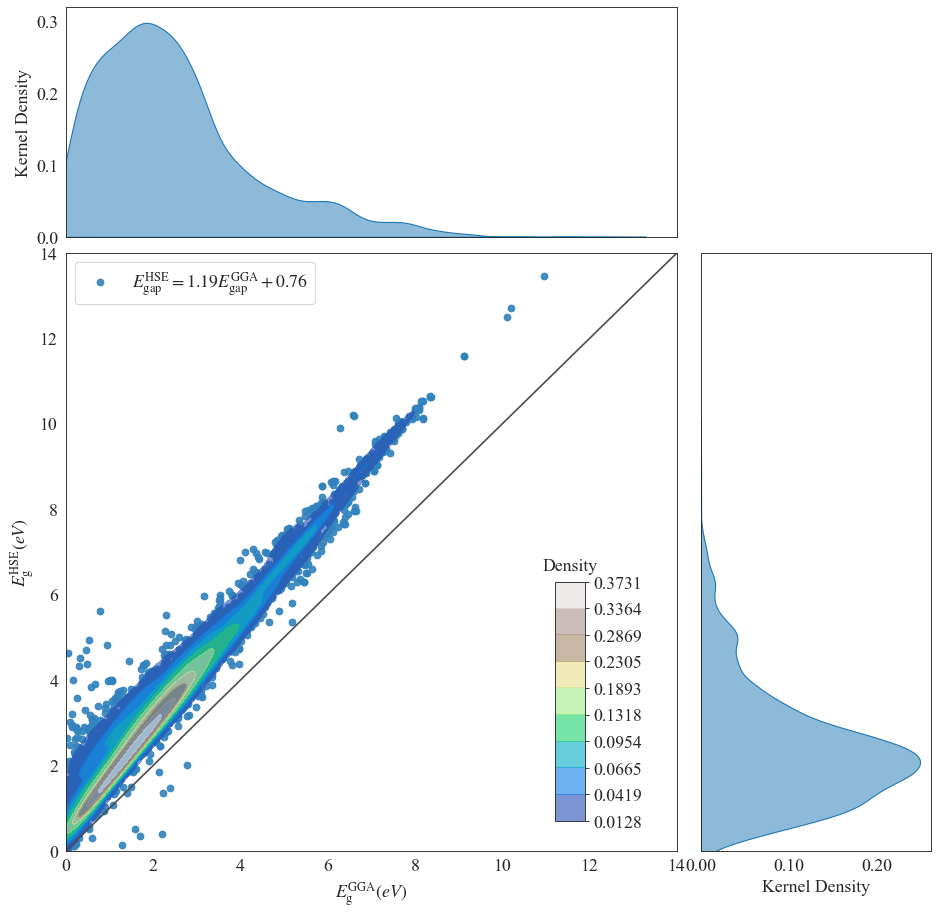

In [7]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats
import matplotlib as mpl
%matplotlib inline
sns.set_style('white')

fig = plt.figure(figsize=(16, 16), dpi= 80)
gs = plt.GridSpec(8, 8, hspace=0.15, wspace=0.23)
mpl.rcParams['font.family'] = 'Times New Roman'
ax1 = fig.add_subplot(gs[0:2, :5])
sns.kdeplot(data=df1, x='GGA',ax=ax1, color='#1f77b4', fill=True, alpha=0.5, shade=True)

ax1.set_xticks([])
ax1.set_xlabel(None)
ax1.set_ylabel('Kernel Density')
ax1.set_xlim(left=0)
ax1.set_ylim([0, 0.32])
ax3 = fig.add_subplot(gs[2:7, :5])

ax3.scatter('GGA', 'HSE', data=df1, alpha=.9, cmap="tab10", color='#3182bd',
            label=r'$ E_{\mathrm{gap}}^{\mathrm{HSE}} =  1.19 E_{\mathrm{gap}}^{\mathrm{GGA}} + 0.76 $')
ax3.legend()
cbar_ax =  ax3.inset_axes([0.8, 0.05, 0.05, 0.4])
cbar_ax.set_title('Density', pad=10)
kde = sns.kdeplot(data=df1, x='GGA', y='HSE', cmap='terrain',
                  shade=True, cbar=True, cbar_ax=cbar_ax,shade_lowest=False, ax=ax3, alpha=0.6)
ax3.set_xlim([0, 14])
ax3.set_ylim([0, 14])
ax3.plot(ax3.get_xlim(), ax3.get_ylim(), ls="-", c=".3")

#Calculate the regression line and get its equation
#slope, intercept, r_value, p_value, std_err = stats.linregress(df1['GGA'], df1['HSE'])
#line = f'Eg(HSE) = {slope:.2f} \u00B7 Eg(GGA) + {intercept:.2f}'

#ax3.annotate(line, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=20)

ax3.set_xlabel(r'$ E_{\mathrm{g}}^{\mathrm{GGA}} (eV)  $')
ax3.set_ylabel(r'$ E_{\mathrm{g}}^{\mathrm{HSE}} (eV)$')

ax4 = fig.add_subplot(gs[2:7, 5:7])
sns.kdeplot(data=df1, y='HSE', ax=ax4, color='#1f77b4', fill=True, alpha=0.5, shade=True)

import matplotlib.ticker as mtick

ax4.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

ax4.set_ylabel(None)
ax4.set_yticks([])
ax4.set_xlabel('Kernel Density')
ax4.set_xlim(left=0)
ax4.set_ylim([0, 20])

plt.tight_layout()
#plt.show()
plt.savefig('./figures/figure1.png', dpi=300, bbox_inches='tight')

In [8]:
mp_data = pd.read_csv("./data/mp_data_new.csv",index_col=0)
mp_data = mp_data.rename(columns={'formula_pretty':'formula','symmetry':'spacegroup','band_gap':'GGA'})
mp_data = mp_data[['formula','spacegroup','GGA','formation_energy_per_atom','energy_above_hull']]
mp_data = mp_data.dropna(subset=['formula','spacegroup'])
mp_data['index'] = mp_data.index

In [9]:
# Convert to the same chemical formula format
hse_data['formula'] = hse_data['formula'].map(lambda x:Composition(x).reduced_formula)
mp_data['formula'] = mp_data['formula'].map(lambda x:Composition(x).reduced_formula)

In [10]:
#pick out some data https://docs.materialsproject.org/methodology/materials-methodology/electronic-structure/
mp_data['composition'] = mp_data['formula'].map(Composition)
mp_data['is_GGA_U'] = mp_data['composition'].map(lambda x : 1 if ('Co' in x and 'O' in x) or ('Co' in x and 'F' in x)
                                                 or ('Cr'in x and 'O' in x) or ('Cr' in x and 'F' in x)
                                                 or ('Fe'in x and 'O' in x) or ('Fe' in x and 'F' in x)
                                                 or ('Mn'in x and 'O' in x and x.reduced_formula != 'Mn2O3') or ('Mn' in x and 'F' in x)
                                                 or ('Mo'in x and 'O' in x) or ('Mo' in x and 'F' in x)
                                                 or ('Ni'in x and 'O' in x) or ('Ni' in x and 'F' in x)
                                                 or ('V'in x and 'O' in x and x.reduced_formula != 'VO') or ('V' in x and 'F' in x)
                                                 or ('W'in x and 'O' in x) or ('W' in x and 'F' in x)
                                                 else 0
                                                )
mp_data['is_GGA_U'].value_counts()

0    111777
1     42938
Name: is_GGA_U, dtype: int64

In [11]:
mp_data_U = mp_data[mp_data['is_GGA_U']==1]
mp_data_non_U = mp_data[mp_data['is_GGA_U']==0]

In [12]:
# take the intersection
inner_val = pd.merge(hse_data,mp_data_non_U, on=['formula','spacegroup'], how='inner')
inner_val

,formula,HSE,GGA_x,spacegroup,free_energy,index_x,composition_x,GGA_y,formation_energy_per_atom,energy_above_hull,index_y,composition_y,is_GGA_U
0,Cu2GeSe3,0.357144,0.057361,9.0,-3.574910,1,"(Cu, Ge, Se)",0.0000,-0.477014,0.004076,145377,"(Cu, Ge, Se)",0
1,Na2CoCl4,4.477341,2.780673,62.0,-3.567538,2,"(Cl, Co, Na)",0.0192,-1.650927,0.000000,101779,"(Na, Co, Cl)",0
2,NaCrSe2,1.138949,0.407413,166.0,-4.752246,3,"(Cr, Na, Se)",0.7808,-1.044310,0.000000,66800,"(Na, Cr, Se)",0
3,Al2Fe3Si4,0.000000,0.000000,63.0,-6.420703,4,"(Al, Fe, Si)",0.0000,-0.398392,0.010081,135106,"(Al, Fe, Si)",0
4,LaNi4B,0.000000,0.000000,191.0,-6.000872,5,"(B, La, Ni)",0.0000,-0.416482,0.000000,124033,"(La, Ni, B)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14470,LaCuTeO,2.246626,1.417926,129.0,-5.791982,13624,"(Cu, La, O, Te)",1.1839,-2.177789,0.008628,82121,"(La, Cu, Te, O)",0
14471,La3CuS3O2,1.871609,1.088934,62.0,-6.802721,13625,"(Cu, La, O, S)",0.9670,-2.742169,0.000000,84374,"(La, Cu, S, O)",0
14472,La3GaS5O,1.968560,1.153778,62.0,-6.389724,13630,"(Ga, La, O, S)",1.2434,-2.395346,0.000000,9807,"(La, Ga, S, O)",0
14473,In6Ga2PtO8,1.503397,0.613842,225.0,-5.429347,13631,"(Ga, In, O, Pt)",0.5672,-1.778338,0.000000,147398,"(In, Ga, Pt, O)",0


In [13]:
# Keep the closest result calculated by GGA
inner_val['GGA_err'] = np.abs(inner_val['GGA_x'] -  inner_val['GGA_y'])
inner_val = inner_val.groupby(['formula','spacegroup'],as_index=False).min(['GGA_err'])
keeped_data = inner_val
inner_val

,formula,spacegroup,HSE,GGA_x,free_energy,index_x,GGA_y,formation_energy_per_atom,energy_above_hull,index_y,is_GGA_U,GGA_err
0,Ag,194.0,0.000000,0.00000,-2.721318,4650,0.0000,0.007226,0.007226,50331,0,0.00000
1,Ag(AuF4)2,14.0,2.060208,0.29665,-3.233511,2106,0.2585,-1.385379,0.000000,108057,0,0.03815
2,Ag(Bi2S3)3,12.0,0.000000,0.00000,-4.253158,980,0.0000,-0.592917,0.029380,139197,0,0.00000
3,Ag(CO)2,15.0,2.428665,1.20222,-6.585129,11919,0.7248,-0.646890,0.415317,131244,0,0.47742
4,Ag(Mo3Se4)2,148.0,0.000000,0.00000,-6.886230,1802,0.0000,-0.714146,0.076030,24039,0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
10726,ZrVGe,139.0,0.000000,0.00000,-7.972034,12348,0.0000,-0.662724,0.000000,58118,0,0.00000
10727,ZrW2,227.0,0.000000,0.00000,-11.656033,10390,0.0000,-0.145862,0.000000,92329,0,0.00000
10728,ZrZn,221.0,0.000000,0.00000,-5.101354,11114,0.0000,-0.287190,0.000000,89434,0,0.00000
10729,ZrZn2,227.0,0.000000,0.00000,-3.880027,5606,0.0000,-0.302553,0.000000,96359,0,0.00000


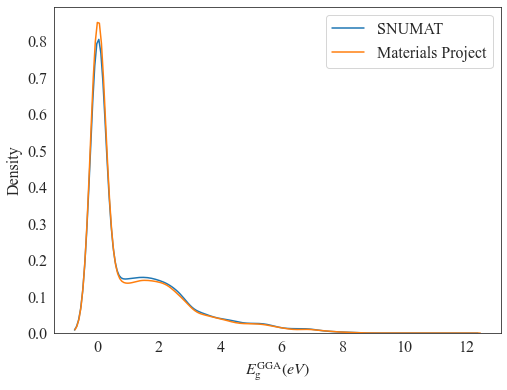

In [27]:
plt.figure(figsize=(8,6))
sns.kdeplot(inner_val['GGA_x'],label='SNUMAT')
sns.kdeplot(inner_val['GGA_y'],label='Materials Project')
plt.xlabel(r'$E_{\mathrm{g}}^{\mathrm{GGA}} (eV)$')
plt.legend()
plt.show()

# 数据处理

In [15]:
# Handle data with the same chemical formula and space group
def handle_with_the_same_formula_and_spacegroup(df):

    formula_repeat_data = df[df[["formula"]].duplicated(keep=False)]
    formula_repeat_data = formula_repeat_data.sort_values('formula')
 
    formula_and_spacegroup_repeat_data = formula_repeat_data[formula_repeat_data[["formula",'spacegroup']].duplicated(keep=False)]
    formula_and_spacegroup_repeat_data = formula_and_spacegroup_repeat_data.sort_values('formula')
   
    formula_and_spacegroup_repeat_data['index'] = formula_and_spacegroup_repeat_data.index
    keeped_repeat_spacegroup_data = pd.DataFrame()
    if 'formation_energy_per_atom' in df.columns and 'energy_above_hull' in df.columns:
        keeped_repeat_spacegroup_data = formula_and_spacegroup_repeat_data.groupby(['formula','spacegroup'],
                                                                                   as_index=False).min(['formation_energy_per_atom',
                                                                                                        'energy_above_hull'])
    elif 'free_energy' in df.columns:
        keeped_repeat_spacegroup_data = formula_and_spacegroup_repeat_data.groupby(['formula','spacegroup'],as_index=False).min(['free_energy'])
    
    keeped_repeat_spacegroup_data.index = keeped_repeat_spacegroup_data['index']
    keeped_repeat_spacegroup_data = keeped_repeat_spacegroup_data.drop(columns='index')
    
    droped_repeat_spacegroup_data = formula_repeat_data.drop(index = formula_and_spacegroup_repeat_data.index)
    df = df.drop(index = formula_and_spacegroup_repeat_data.index)
  
    df = pd.concat([df,keeped_repeat_spacegroup_data],axis=0)
    return df

In [16]:
hse_data = handle_with_the_same_formula_and_spacegroup(hse_data)

In [17]:
def remove_single_element(data):
    # delete a single element
    data['composition'] = data['formula'].map(Composition)
    data['is_single_element'] = data['composition'].map(lambda x: 1 if len(x)==1 else 0)
    data = data[data['is_single_element']==0]
    data = data.drop(columns = 'is_single_element')
    return data
hse_data = remove_single_element(hse_data)

In [18]:
from matminer.featurizers.base import MultipleFeaturizer
from matminer.featurizers import composition as cf
from matminer.featurizers.conversions import StrToComposition
feature_calculators = MultipleFeaturizer([cf.Stoichiometry(), cf.ElementProperty.from_preset("magpie"),
                                          cf.ValenceOrbital(props=['avg']), cf.IonProperty(fast=True)])
data = feature_calculators.featurize_dataframe(hse_data, col_id='composition');
feature_labels = feature_calculators.feature_labels()
X = data[feature_labels]

MultipleFeaturizer:   0%|          | 0/12775 [00:00<?, ?it/s]

In [19]:
hse_data['is_metal'] = hse_data['HSE'].map(lambda x: 0 if x>0 else 1)
y = hse_data['is_metal']

In [20]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''  
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    return x

In [21]:

X = data[feature_labels]
X = remove_collinear_features(X, 0.8);
feature_labels = X.columns
if 'spacegroup' not in feature_labels:
    feature_labels = feature_labels.insert(-1,'spacegroup')
X = data[feature_labels]

# 空间群重要性分析

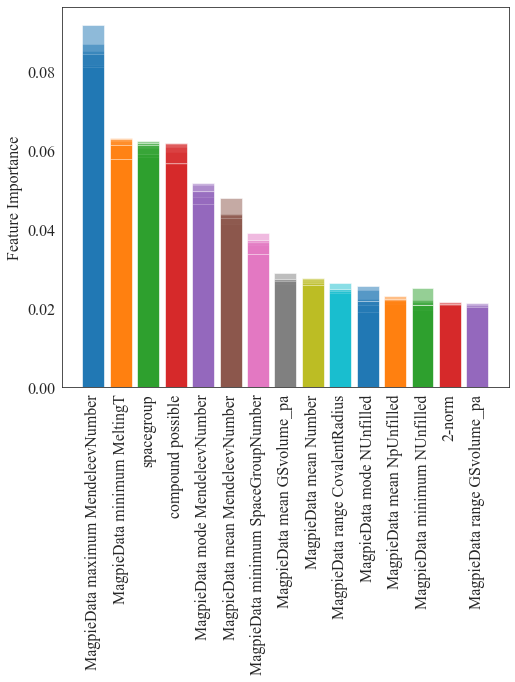

In [22]:
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
X = X.dropna()
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
feature_importances_list = []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    rf.fit(X_train, y_train)

    feature_importances = rf.feature_importances_

    feature_importances_list.append(feature_importances)

feature_importances_df = pd.DataFrame(feature_importances_list, columns=X.columns)

mean_feature_importances = feature_importances_df.mean()

top_features_names = mean_feature_importances.sort_values(ascending=False)[:15].index.tolist()

fig, ax = plt.subplots(figsize=(8, 7))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, feature in enumerate(top_features_names):
    feature_importances = feature_importances_df[feature].values
    ax.bar(feature, mean_feature_importances[feature], color=colors[i%len(colors)], alpha=0.5)
    ax.bar(feature, feature_importances, color=colors[i%len(colors)], alpha=0.5)

ax.set_xticklabels(top_features_names, rotation=90)
ax.set_ylabel('Feature Importance')

plt.show()

In [25]:
feature_x = pd.DataFrame({'Feature': top_features_names, 'Importance':mean_feature_importances[top_features_names]})
#feature_x = feature_importances.reset_index(drop=True)
feature_x['feature'] = [r'$x$'+ fr'${str(i)}$' for i in range(1,16)]

feature_x

,Feature,Importance,feature
MagpieData maximum MendeleevNumber,MagpieData maximum MendeleevNumber,0.085254,$x$$1$
MagpieData minimum MeltingT,MagpieData minimum MeltingT,0.061484,$x$$2$
spacegroup,spacegroup,0.060618,$x$$3$
compound possible,compound possible,0.059583,$x$$4$
MagpieData mode MendeleevNumber,MagpieData mode MendeleevNumber,0.049422,$x$$5$
MagpieData mean MendeleevNumber,MagpieData mean MendeleevNumber,0.043921,$x$$6$
MagpieData minimum SpaceGroupNumber,MagpieData minimum SpaceGroupNumber,0.036538,$x$$7$
MagpieData mean GSvolume_pa,MagpieData mean GSvolume_pa,0.027176,$x$$8$
MagpieData mean Number,MagpieData mean Number,0.026743,$x$$9$
MagpieData range CovalentRadius,MagpieData range CovalentRadius,0.024638,$x$$10$


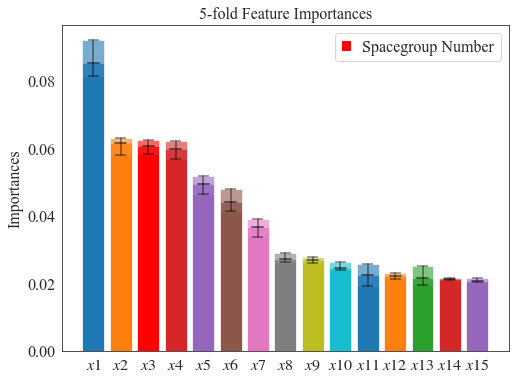

In [26]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots(figsize=(8, 6))

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, feature in enumerate(top_features_names):
    feature_importances = feature_importances_df[feature].values
    if i == 2:
        ax.bar(feature, feature_importances.min(), color='red', alpha=1)
        ax.bar(feature, mean_feature_importances[feature], color='red', alpha=0.8, label='Spacegroup')
        ax.bar(feature, feature_importances.max(), color='red', alpha=0.6)
    else:
        ax.bar(feature, feature_importances.min(), color=colors[i%len(colors)], alpha=1)
        ax.bar(feature, mean_feature_importances[feature], color=colors[i%len(colors)], alpha=0.8)
        ax.bar(feature, feature_importances.max(), color=colors[i%len(colors)], alpha=0.6)
    #error bars
    mean_importance = mean_feature_importances[feature]
    max_importance = feature_importances.max()
    min_importance = feature_importances.min()

    ax.plot([i, i], [min_importance, max_importance], lw=1.5, c='black',alpha=0.5)
    ax.hlines([min_importance, max_importance], i-0.2, i+0.2, lw=1.5, colors='black',alpha=0.5)
    ax.plot([i-0.2, i+0.2], [mean_importance, mean_importance], lw=2, c='black',alpha=0.5)

ax.set_xticklabels(feature_x['feature'])
ax.set_ylabel('Importances')
ax.set_title('5-fold Feature Importances')

#rects = ax.patches
#hist_5_pos = rects[4].get_xy()
#hist_5_height = rects[4].get_height()

# legend
handles = [mpatches.Patch(facecolor='red', edgecolor='red', alpha=1)]
labels = ['Spacegroup Number']
ax.legend(handles=handles, labels=labels, loc='upper right', handlelength=0.5, handleheight=0.5)

#plt.show()
plt.savefig('./figures/5_fold_imp.png', dpi=300, bbox_inches='tight')